## Clustering Algorithms: Mean Shift
---
Very often datasets contain information about overall trends that aren't explicitly stated. By looking at a dataset's relation to itself we can infer some of this information. This lies within the field of **Unsupervised Machine Learning**.

**Clustering Algorithms** are a class of tools that allow us to identify subsets of the data that tend to cluster together. Two popular clustering algorithms are K-Means and Mean Shift clustering. K-Means is simpler, but has some drawbacks and requires you to tell it how many clusters to fit the data to. We'll instead cover Mean Shift as it's more versatile, and infers on its own how many clusters exist in the data.


## Setup:
---

In [1]:
%matplotlib inline

import numpy as np

from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs

import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

## Proof of Concept:
---
We'll start with a simple example to build some intuition.

First our toy dataset:

In [2]:
# the centroids of the 'actual' clusters
centers = [[1,1], [6,6]]
X, _ = make_blobs(n_samples=400, n_features=2, centers=centers, cluster_std=1.)

The above block creates 400 points evenly distributed between two clusters around the coordinates `(1,1)` and `(6,6)` on the x-y plane with a standard deviation of `1.0`. The sklearn function `make_blobs` returns the data points as well as the truth-labels, but we won't be given the actual labels in the real world so we put them into here into the dummy variable `_`.

The labels consist of the index of which cluster each point belongs to. We can get an idea of what that looks like by printing the first ten labels:

In [3]:
_[:10]

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1])

Likewise, their corresponding data points:

In [4]:
X[:10]

array([[ 5.51981401,  3.82161018],
       [ 6.09593274,  7.12760428],
       [ 6.94362836,  7.0192451 ],
       [ 5.37707266,  4.8471228 ],
       [ 0.54944857, -0.31481711],
       [ 5.16369736,  5.68289813],
       [-0.59266132,  2.41937127],
       [ 6.81777274,  6.00005567],
       [ 0.44281252,  1.13414255],
       [ 7.36231986,  6.26789761]])

Let's visualize the full dataset:

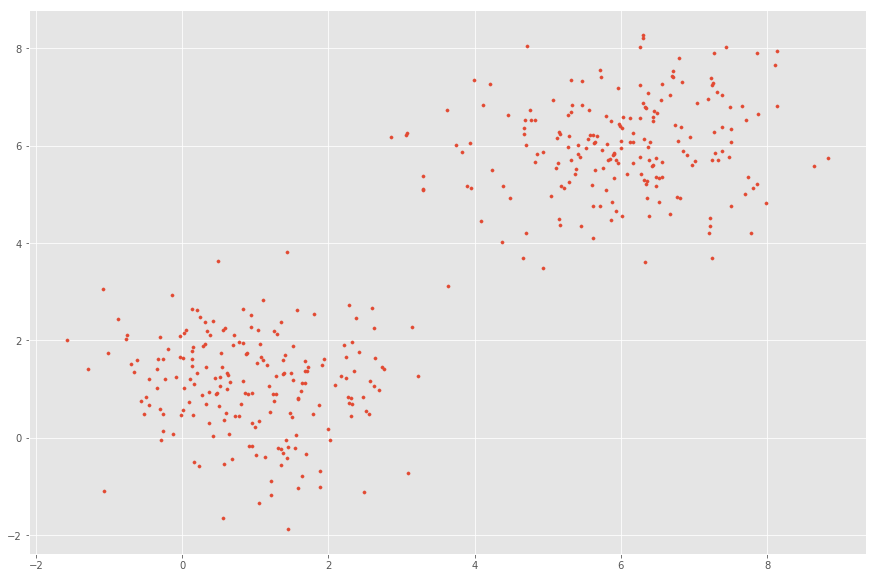

In [5]:
plt.figure(figsize=(15,10)) # set custom display size
plt.scatter(X[:,0], X[:,1], s=10)

Very obviously two distinct clusters. 

Notes on syntax: Python allows for array slicing. `some_array[:10]` will return the first ten elements of `some_array`, and `some_array[0][-1]` will return the last element of the first subarray in `some_array`. Note `some_array[:10]` is the same as `some_array[0:10]`. Python is zero-indexed and `-1` is the index of the last item of a list. *Caution:*  `some_array[0:-1]` will return a slice of `some_array` up to but **not** including the last element because Python follows the convention of `some_array[start_before : end_before]`.

Let's see how Mean Shift does on this example:

In [6]:
ms = MeanShift()
ms.fit(X)

labels = ms.labels_
cluster_centers = ms.cluster_centers_

n_clusters = len(np.unique(labels))

`ms = MeanShift()` assigns the variable `ms` to the `MeanShift` class which we imported from scikit-learn's cluster module. The class has its own methods which give us all the functionality we need. Running the Mean Shift algorithm then is as simple as calling `ms.fit(X)` which fits the clustering algorithm to our dataset `X`.

The generated labels and estimated cluster centers are retrieved by calling `ms.labels_` and `ms.cluster_centers_`; don't forget the trailing underscore!

Finally we make a new variable, `n_clusters` which we set equal to the number of unique labels.

Now we can take a look at where Mean Shift thinks our centers are:

In [7]:
print(cluster_centers)

[[ 0.9190759   1.13827204]
 [ 6.12303292  5.98772341]]


So far so good. The estimates are very close to the actual centroids. Let's visualize this:

Number of clusters:  2


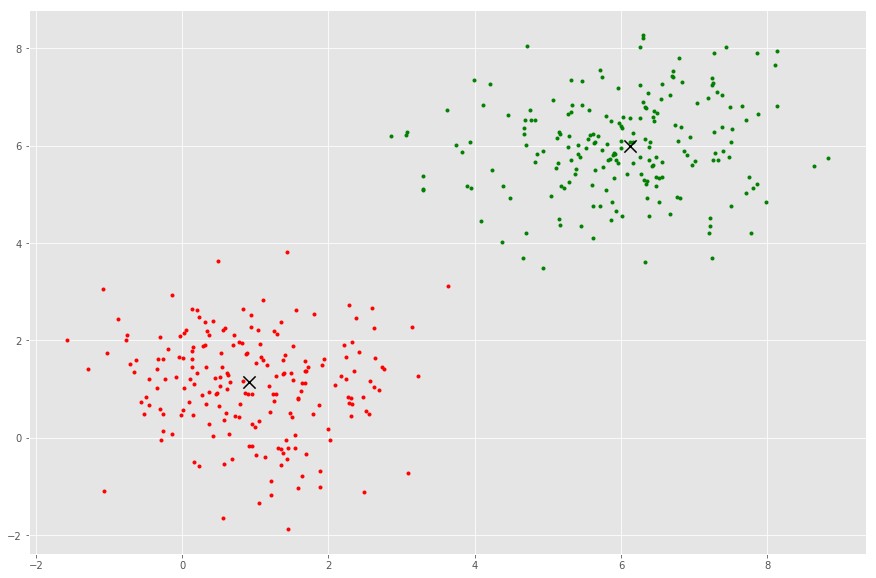

In [107]:
colors = ['r.','g.','b.','c.','m.','y.']*5

plt.figure(figsize=(15,10))
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]])
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], 
            marker="x", zorder=10, s=150, c='k')

print("Number of clusters: ", n_clusters)

There are our two clusters, with their centroids marked by black X's.

Now we can split the data up by cluster:

In [101]:
X_clstr0, X_clstr1 = X[np.where(labels==0)], X[np.where(labels==1)]
print("Cluster 0:\n", X_clstr0[:5])
print("Cluster 1:\n", X_clstr1[:5])

Cluster 0:
 [[ 0.3379828   2.18990758]
 [-1.08285401  3.06177904]
 [ 1.43663611  3.82033262]
 [-0.02111141  0.46451026]
 [ 2.61857684  1.05521624]]
Cluster 1:
 [[ 7.80536423  5.13433131]
 [ 7.86908494  6.64970967]
 [ 4.67427634  6.24314773]
 [ 6.94345762  6.16840694]
 [ 5.40876874  6.01867812]]


Or scan through the data set:

In [105]:
for i in range(5):
    print("Coordinate: ", X[i], "Label: ", labels[i])

Coordinate:  [ 7.80536423  5.13433131] Label:  1
Coordinate:  [ 0.3379828   2.18990758] Label:  0
Coordinate:  [ 7.86908494  6.64970967] Label:  1
Coordinate:  [-1.08285401  3.06177904] Label:  0
Coordinate:  [ 1.43663611  3.82033262] Label:  0


## Algorithm Limitations
---
Mean Shift isn't omnipotent. Mean Shift will merge clusters that converge to the same centroid. So if two clusters heavily overlap, they may be treated as one.

We can see this by bringing our actual centroid closer together and/or raising the standard deviation:

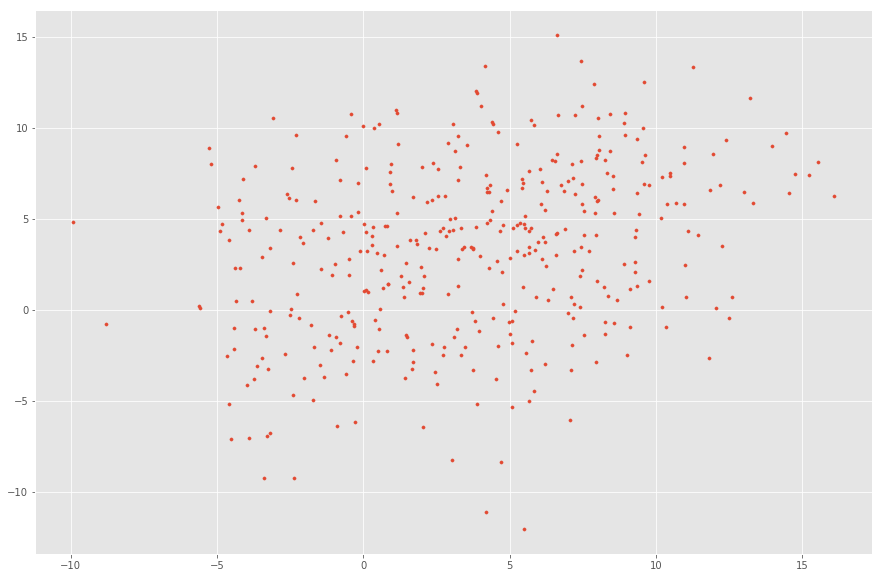

In [184]:
centers = [[1,1], [6,6]]
X, _ = make_blobs(n_samples=400, n_features=2, centers=centers, cluster_std=4.)

plt.figure(figsize=(15,10))
plt.scatter(X[:,0], X[:,1], s=10)

[[ 4.41262837  4.36078727]]
Number of clusters:  1


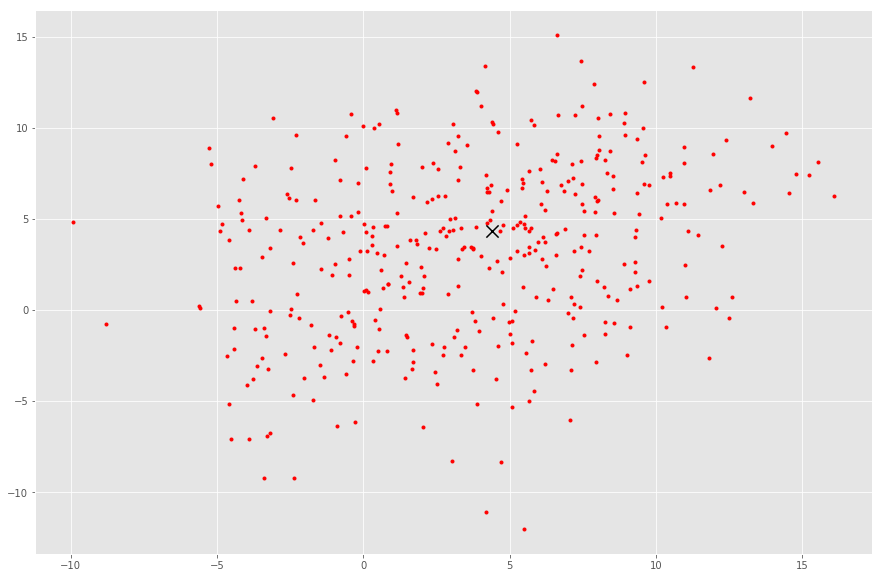

In [186]:
def run_MS(visuals=True):
    ms = MeanShift()
    ms.fit(X)

    labels = ms.labels_
    cluster_centers = ms.cluster_centers_

    n_clusters = len(np.unique(labels))
    print(cluster_centers)

    if visuals:
        colors = ['r.','g.','b.','c.','m.','y.']*5

        plt.figure(figsize=(15,10))
        for i in range(len(X)):
            plt.plot(X[i][0], X[i][1], colors[labels[i]])
        plt.scatter(cluster_centers[:,0], cluster_centers[:,1], 
                    marker="x", zorder=10, s=150, c='k')

    print("Number of clusters: ", n_clusters)
    
    return labels, cluster_centers

run_MS();

However, if there's an outlier point that doesn't converge with the rest, Mean Shift will make it it's own cluster.

[[  2.65359408   2.34515786]
 [ 14.10449026   0.11468108]]
Number of clusters:  2


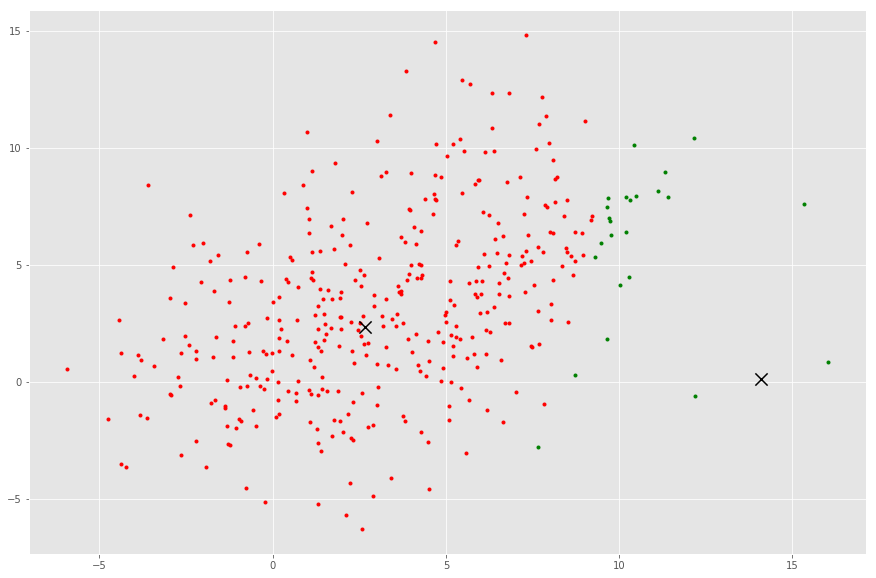

In [202]:
centers = [[1,1], [6,6]]
X, _ = make_blobs(n_samples=400, n_features=2, centers=centers, cluster_std=3.)

run_MS();

## Fancier Visuals:
---

In [205]:
labels, cluster_centers = run_MS(visuals=False)

[[  2.65359408   2.34515786]
 [ 14.10449026   0.11468108]]
Number of clusters:  2


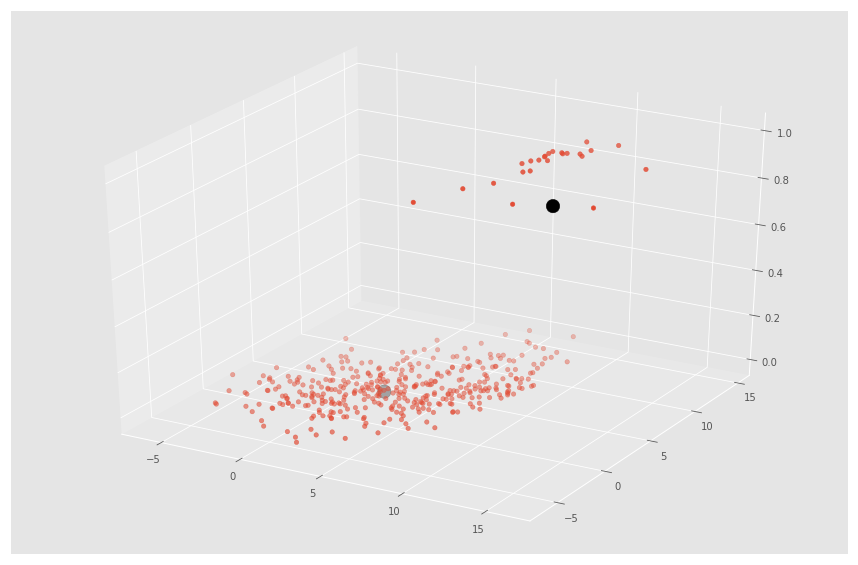

In [226]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], labels)
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], 
           np.arange(len(cluster_centers)), c='k', s=180)

Setting the z-axis to a 3rd coordinate for data with more dimensions, instead of as the label, makes it clear how hard it can be to eyeball the data:

[[ 5.00001849  4.87317604  1.03501648]
 [ 0.98204018  0.94756917  1.07166442]
 [ 3.00060312  9.96162324  0.82835103]]
Number of clusters:  3


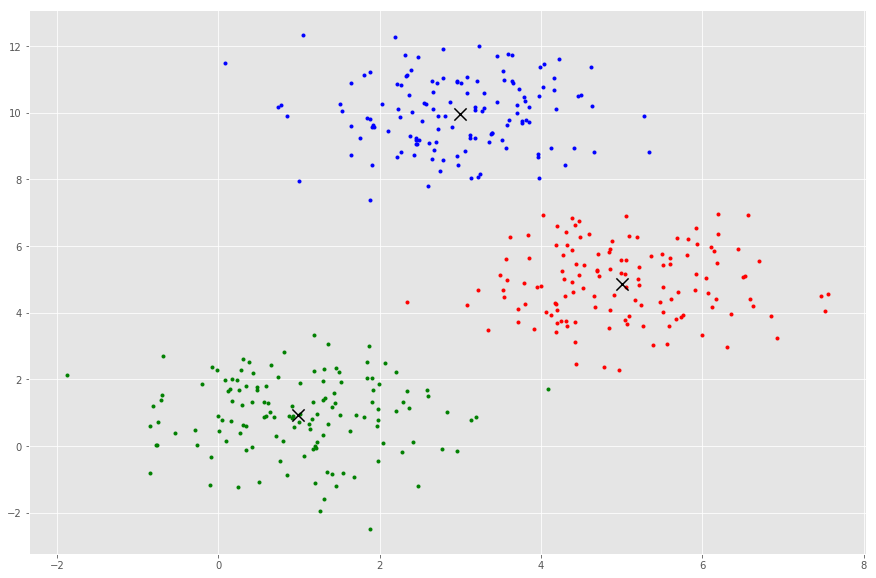

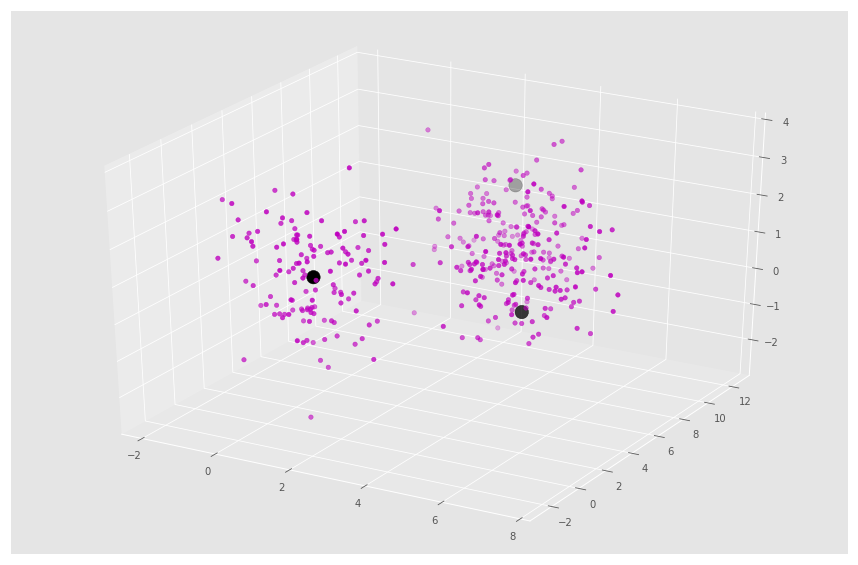

In [271]:
centers = [[1,1,1],[5,5,1],[3,10,1]]
X, _ = make_blobs(n_samples=400, centers=centers, cluster_std=1)

labels, cluster_centers = run_MS(visuals=True);

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c='m')
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], 
           np.arange(len(cluster_centers)), c='k', s=180)